In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_raw = pd.read_csv("Data/dataset_mood_smartphone.csv")

In [3]:
print(data_raw.columns)

Index(['Unnamed: 0', 'id', 'time', 'variable', 'value'], dtype='object')


In [4]:
variables = data_raw['variable'].unique()
print(variables)

['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


In [5]:
data_raw['time'] = pd.to_datetime(data_raw['time'])

In [6]:
data_raw = data_raw.drop(columns=['Unnamed: 0'])

In [7]:
df_wide = data_raw.pivot_table(index=['id', 'time'], columns='variable', values='value').reset_index()

In [8]:
def create_affect_feature(row):
    if row['circumplex.valence'] == 'NaN' or row['circumplex.arousal'] == 'NaN':
        return
    else:
        return (row['circumplex.arousal']*5)+row['circumplex.valence']
        

In [9]:
df_wide['affect'] = df_wide.apply(lambda row: create_affect_feature(row), axis=1)

In [10]:
display(df_wide)

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,affect
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358922,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358923,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358924,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_daily = df_wide.groupby([pd.Grouper(key='time', freq='D'), 'id']).agg({'mood':'mean', 
                                                                           'circumplex.arousal':'mean',
                                                                           'circumplex.valence':'mean',
                                                                           'affect':'mean',
                                                                           'activity':'count',
                                                                           'screen':'sum',
                                                                           'call':'count',
                                                                           'sms':'count',
                                                                           'appCat.builtin':'sum',
                                                                           'appCat.communication':'sum',
                                                                           'appCat.entertainment':'sum',
                                                                           'appCat.finance':'sum',
                                                                           'appCat.game':'sum',
                                                                           'appCat.office':'sum',
                                                                           'appCat.other':'sum',
                                                                           'appCat.social':'sum',
                                                                           'appCat.travel':'sum',
                                                                           'appCat.unknown':'sum',
                                                                           'appCat.utilities':'sum',
                                                                           'appCat.weather':'sum'
                                                                           }).reset_index()

In [19]:
display(df_daily)

,time,id,mood,circumplex.arousal,circumplex.valence,affect,activity,screen,call,sms,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,2014-02-17,AS14.01,NaN,NaN,NaN,NaN,0,0.000000,2,0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0
1,2014-02-17,AS14.02,NaN,NaN,NaN,NaN,0,0.000000,4,2,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0
2,2014-02-17,AS14.03,NaN,NaN,NaN,NaN,0,0.000000,0,1,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0
3,2014-02-17,AS14.06,NaN,NaN,NaN,NaN,0,0.000000,5,0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0
4,2014-02-17,AS14.08,NaN,NaN,NaN,NaN,0,0.000000,0,4,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,2014-06-05,AS14.24,7.0,0.0,1.0,1.0,24,2371.588999,11,0,...,0.0,0.0,0.0,0.0,47.360,171.964,225.737,0.0,0.000,0.0
1969,2014-06-06,AS14.24,7.5,0.5,1.0,-9.0,24,2733.332000,16,0,...,0.0,0.0,0.0,0.0,36.414,0.000,0.000,0.0,2.072,0.0
1970,2014-06-07,AS14.24,8.0,-1.0,NaN,NaN,24,5530.377999,0,2,...,0.0,0.0,0.0,0.0,6.214,106.850,0.000,0.0,0.000,0.0
1971,2014-06-08,AS14.24,6.5,-1.5,1.0,-6.5,4,1131.197999,0,0,...,0.0,0.0,0.0,0.0,18.069,190.760,0.000,0.0,0.000,0.0


AS14.01
AS14.02
AS14.03
AS14.06
AS14.08
AS14.09
AS14.13
AS14.14
AS14.15
AS14.16
AS14.17
AS14.19
AS14.20
AS14.23
AS14.25
AS14.26
AS14.27
AS14.28
AS14.29
AS14.30
AS14.31


C:\Users\Jaimie\Anaconda3\envs\DMT\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


AS14.32
AS14.33
AS14.05
AS14.12
AS14.07
AS14.24


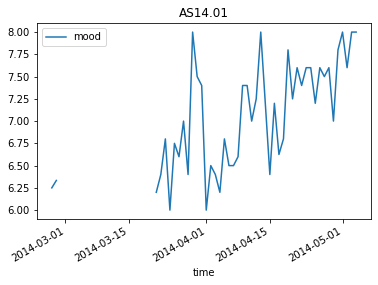

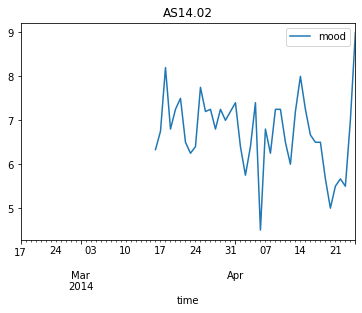

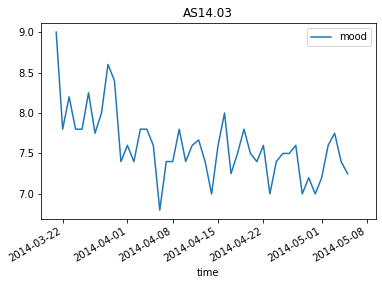

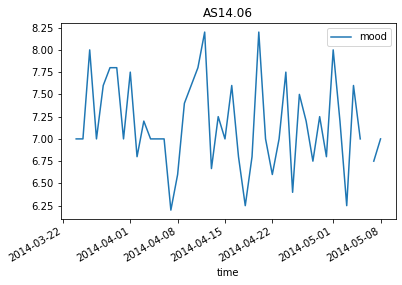

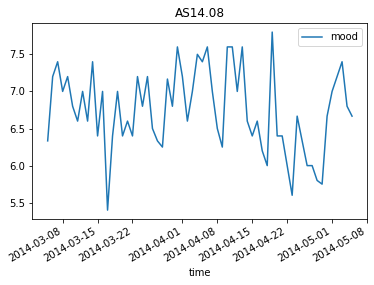

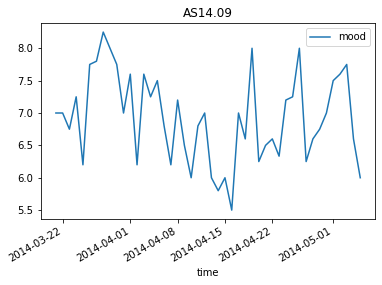

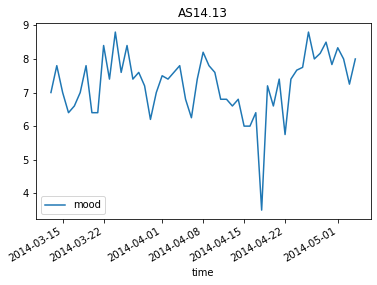

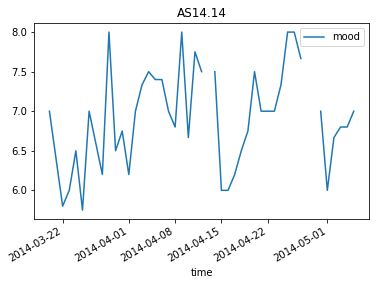

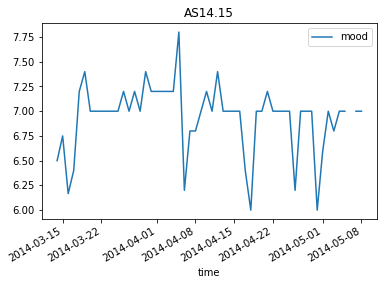

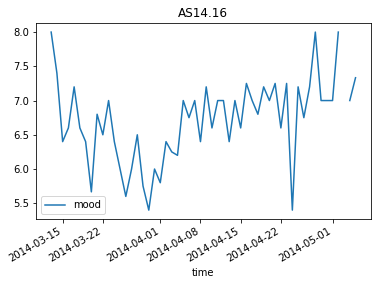

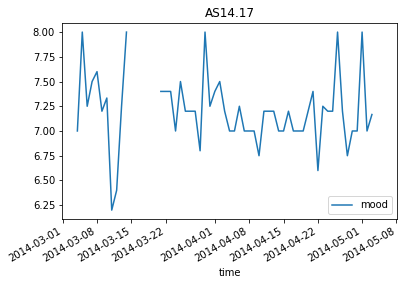

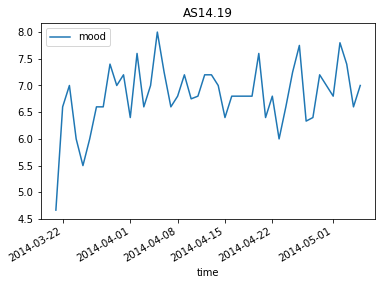

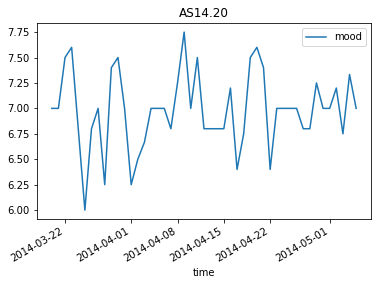

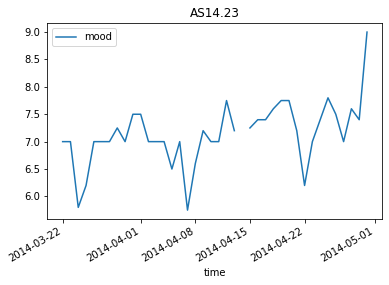

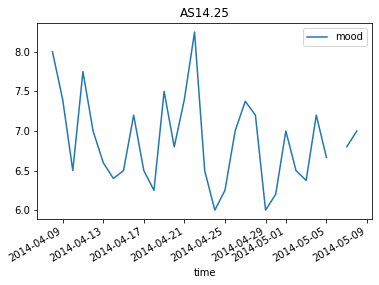

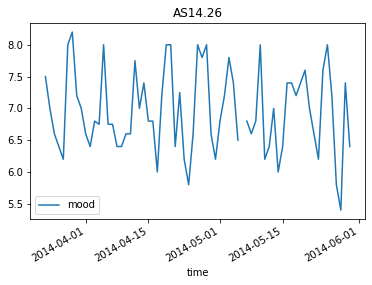

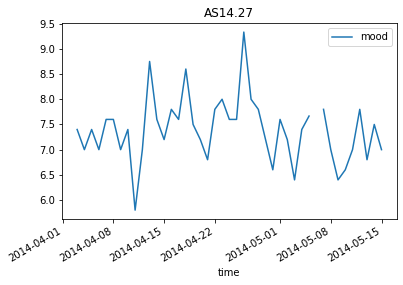

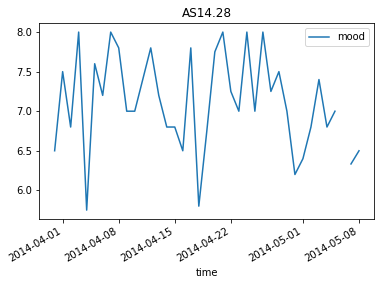

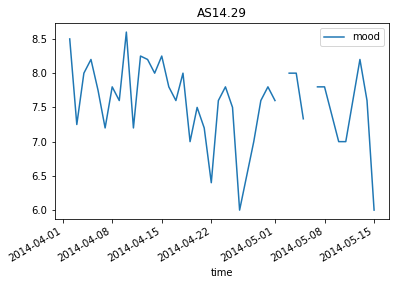

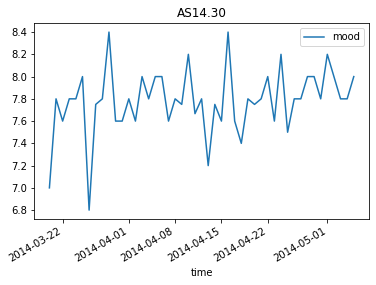

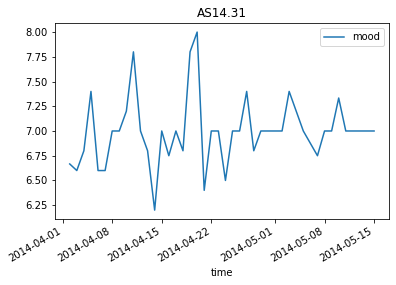

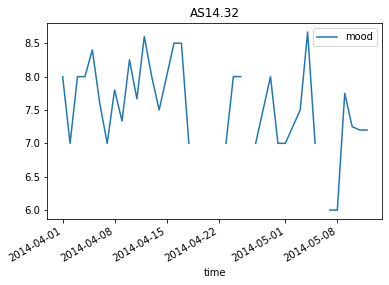

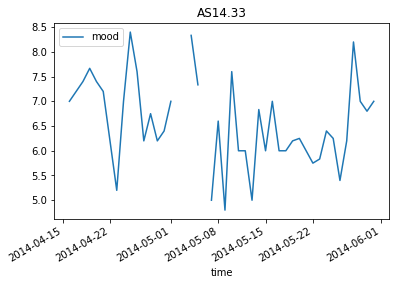

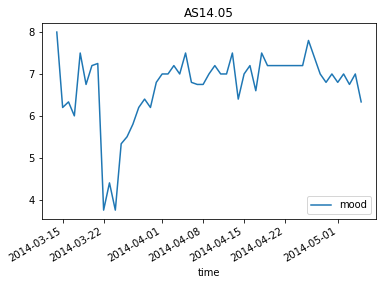

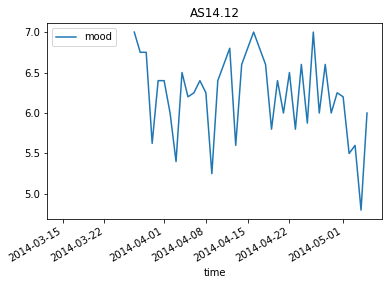

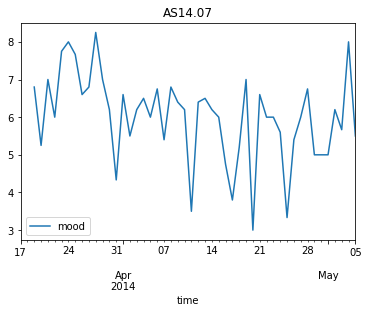

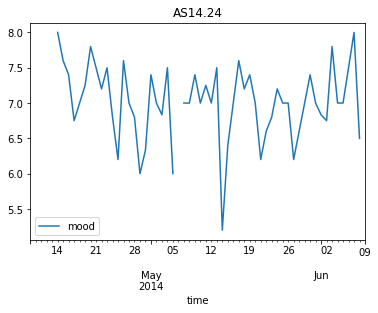

In [23]:
for idx in df_daily['id'].unique():
    df_id = df_daily.loc[df_daily['id']==idx]
    df_id.plot(x='time', y='mood', title=idx)